In [1]:
%load_ext autoreload
%autoreload 2

from neuralarttools.mask import *

### Create and view mask

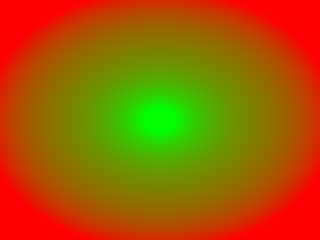

In [2]:
config = {
    'type': 'arcs',
    'size': (320, 240), 
    'num_channels': 3, 
    'period': 10,
    'center': (0.5, 0.5), 
    'radius': 1.0, 
    'blend': 0.25
}

mask = get_mask(config, t=3)
view_mask(mask)

### View each channel separately

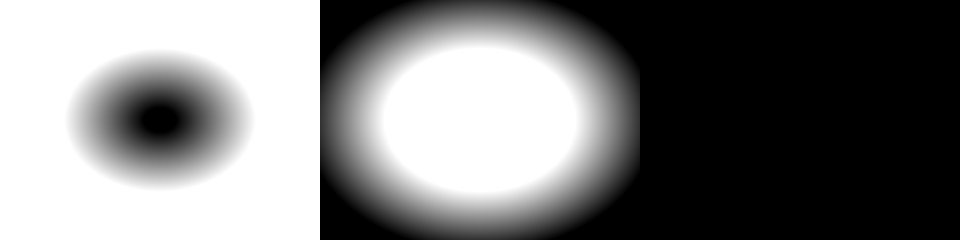

In [3]:
view_mask(mask, draw_rgb=False)

### Image masks

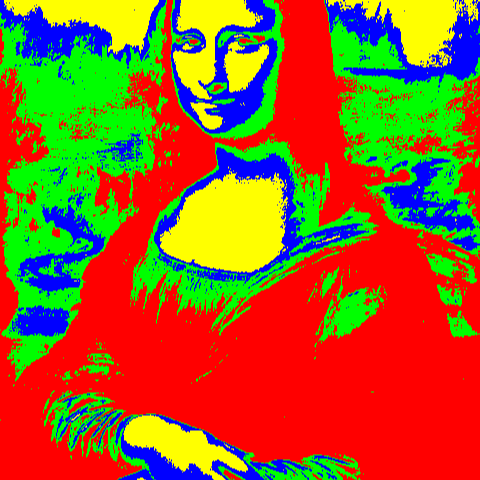

In [4]:
config = {
    'type': 'image',
    'size': (480, 480), 
    'num_channels': 4, 
    'path': 'https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg', 
    'blur_k': 8, 
    'n_dilations': 1
}

mask = get_mask(config)
view_mask(mask)


### Mask sequences

In [13]:
mask_config = {
    'type': 'rects',
    'size': (600, 180), 
    'num_channels': 3, 
    'p1': (1.0, 0.0), 
    'p2': (0.0, 1.0), 
    'width': 2.5, 
    'period': 20,
    'blend': 0.25, 
    'reverse': True
}

masks = [get_mask(mask_config, t) for t in range(40)]
view_mask(masks)

### Some more example sequences

In [12]:
num_channels = 3 
size = (256, 256)
period = 30

mask_configs = [
    {
        'name': '_example_mask_interpolations',
        'type': 'interpolation',
        'size': size, 
        'num_channels': 2, 
        'period': period, 
        'blend': 0.2, 
        'reverse': False, 
        'cross_fade': True
    }, {
        'name': '_example_mask_circles1',
        'type': 'arcs',
        'size': size, 
        'num_channels': 3, 
        'period': period,
        'center': (0.5, 0.5), 
        'radius': 1.0, 
        'blend': 0.2, 
        'inwards': True, 
        'reverse': False
    }, {
        'name': '_example_mask_circles2',
        'type': 'arcs',
        'size': size, 
        'num_channels': 6, 
        'period': 5,
        'center': (0.5, 0.5), 
        'radius': 1.0, 
        'blend': 0.1, 
        'inwards': False, 
        'reverse': True
    }, {
        'name': '_example_mask_rectangles',
        'type': 'rects',
        'size': size, 
        'num_channels': 4, 
        'p1': (0.0, 0.0), 
        'p2': (1.0, 1.0), 
        'width': 2.5, 
        'period': period,
        'blend': 0.25, 
        'reverse': True
    }
]

for mask_config in mask_configs:
    mask_frames = [get_mask(mask_config, t) for t in range(period)]
    save_mask_video('%s.mp4'%mask_config['name'], mask_frames)


### Displaying video sequences

The above code saved the mask videos as local mp4. The code below will display them inline and the notebook does not get bloated with too many images.

In [14]:
mask_videos = ['%s.mp4'%mask_config['name'] for mask_config in mask_configs]
display_local_videos(mask_videos)